### Used Price Car Prediction 

**Question:  "What factors most significantly impact used car prices?"**

In [269]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import random 

random.seed(42)
pd.set_option("display.max_columns", None)
# [x for x in dir(random) if x.startswith("s")]

In [270]:
dataset = pd.read_csv("Used_Car_Price_Prediction.csv")
dataset.head()

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,assured_buy,registered_city,registered_state,is_hot,rto,source,make,model,car_availability,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
0,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,True,delhi,delhi,True,dl6c,inperson_sale,maruti,swift,in_stock,2,397677,404177.0,great,2021-04-04T07:09:18.583,True,8975,57960,False,False
1,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,lxi,True,noida,uttar pradesh,True,up16,inperson_sale,maruti,alto 800,in_stock,1,272935,354313.0,great,2021-03-22T14:07:32.833,True,6167,39825,False,False
2,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,True,agra,uttar pradesh,True,up80,inperson_sale,hyundai,grand i10,in_stock,1,469605,NaN,great,2021-03-20T05:36:31.311,True,11096,71655,False,False
3,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,vdi,True,delhi,delhi,True,dl1c,inperson_sale,maruti,swift,in_stock,1,294262,374326.0,great,2021-01-21T12:59:19.299,True,7154,46200,False,False
4,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,False,new delhi,delhi,True,dl12,inperson_sale,hyundai,grand i10,in_stock,1,360716,367216.0,great,2021-04-01T13:33:40.733,True,8397,54225,False,False


In [271]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7400 entries, 0 to 7399
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             7400 non-null   object 
 1   yr_mfr               7400 non-null   int64  
 2   fuel_type            7400 non-null   object 
 3   kms_run              7400 non-null   int64  
 4   sale_price           7400 non-null   int64  
 5   city                 7400 non-null   object 
 6   times_viewed         7400 non-null   int64  
 7   body_type            7297 non-null   object 
 8   transmission         6844 non-null   object 
 9   variant              7400 non-null   object 
 10  assured_buy          7400 non-null   bool   
 11  registered_city      7390 non-null   object 
 12  registered_state     7390 non-null   object 
 13  is_hot               7400 non-null   bool   
 14  rto                  7400 non-null   object 
 15  source               7274 non-null   o

In [272]:
dataset.describe()

,yr_mfr,kms_run,sale_price,times_viewed,total_owners,broker_quote,original_price,emi_starts_from,booking_down_pymnt
count,7400.000000,7400.000000,7.400000e+03,7400.000000,7400.000000,7.400000e+03,4.120000e+03,7400.000000,7400.000000
mean,2013.885676,62624.520000,4.548892e+05,1550.706081,1.327297,4.322044e+05,5.510351e+05,10565.942027,68233.529054
std,3.087613,43532.042371,2.827023e+05,2080.952842,0.579798,2.880316e+05,3.119887e+05,6566.468434,42405.389468
min,1996.000000,60.000000,0.000000e+00,3.000000,1.000000,0.000000e+00,9.689900e+04,0.000000,0.000000
25%,2012.000000,31885.250000,2.811740e+05,554.750000,1.000000,2.526612e+05,3.414930e+05,6531.250000,42176.250000
50%,2014.000000,55765.000000,3.824490e+05,1088.000000,1.000000,3.611445e+05,4.674800e+05,8883.000000,57367.500000
75%,2016.000000,84184.000000,5.401490e+05,1926.500000,2.000000,5.260180e+05,6.675258e+05,12546.250000,81022.500000
max,2021.000000,996609.000000,3.866000e+06,61930.000000,6.000000,3.250000e+06,2.765057e+06,89798.000000,579901.000000


#### Now we deal with the null values in the dataset to make it balanced 

In [273]:
dataset.isnull().sum()

car_name                  0
yr_mfr                    0
fuel_type                 0
kms_run                   0
sale_price                0
city                      0
times_viewed              0
body_type               103
transmission            556
variant                   0
assured_buy               0
registered_city          10
registered_state         10
is_hot                    0
rto                       0
source                  126
make                      0
model                     0
car_availability        620
total_owners              0
broker_quote              0
original_price         3280
car_rating                9
ad_created_on             1
fitness_certificate       8
emi_starts_from           0
booking_down_pymnt        0
reserved                  0
warranty_avail            0
dtype: int64

**Here we are going to check for the null or missing values and deal with them separately**

In [274]:
dataset.isnull().sum()[dataset.isnull().sum() > 0]

body_type               103
transmission            556
registered_city          10
registered_state         10
source                  126
car_availability        620
original_price         3280
car_rating                9
ad_created_on             1
fitness_certificate       8
dtype: int64

In [275]:
null_ = dataset.isnull().sum()[dataset.isnull().sum() > 0].index 
null_features = list(null_)

In [276]:
null_features

['body_type',
 'transmission',
 'registered_city',
 'registered_state',
 'source',
 'car_availability',
 'original_price',
 'car_rating',
 'ad_created_on',
 'fitness_certificate']

In [277]:
null_data = dataset[null_features].copy()

In [278]:
null_data.head()

,body_type,transmission,registered_city,registered_state,source,car_availability,original_price,car_rating,ad_created_on,fitness_certificate
0,hatchback,manual,delhi,delhi,inperson_sale,in_stock,404177.0,great,2021-04-04T07:09:18.583,True
1,hatchback,manual,noida,uttar pradesh,inperson_sale,in_stock,354313.0,great,2021-03-22T14:07:32.833,True
2,hatchback,manual,agra,uttar pradesh,inperson_sale,in_stock,NaN,great,2021-03-20T05:36:31.311,True
3,hatchback,manual,delhi,delhi,inperson_sale,in_stock,374326.0,great,2021-01-21T12:59:19.299,True
4,hatchback,manual,new delhi,delhi,inperson_sale,in_stock,367216.0,great,2021-04-01T13:33:40.733,True


In [279]:
# pd.set_option("display.max_colwidth", None)
null_data.describe(include="all") # We now describe all the values to see how we will take care of the null data

,body_type,transmission,registered_city,registered_state,source,car_availability,original_price,car_rating,ad_created_on,fitness_certificate
count,7297,6844,7390,7390,7274,6780,4.120000e+03,7391,7399,7392
unique,5,2,243,16,3,4,NaN,4,7398,2
top,hatchback,manual,delhi,maharashtra,inperson_sale,in_stock,NaN,great,2021-03-07T10:10:19.937,True
freq,4358,6215,963,2108,6834,6485,NaN,6299,2,7247
mean,NaN,NaN,NaN,NaN,NaN,NaN,5.510351e+05,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,3.119887e+05,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,9.689900e+04,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,3.414930e+05,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,4.674800e+05,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,6.675258e+05,NaN,NaN,NaN


In [280]:
for i in null_features:
    print(f"{i}:{null_data[i].unique()}")

body_type:['hatchback' 'sedan' 'suv' 'luxury sedan' 'luxury suv' nan]
transmission:['manual' nan 'automatic']
registered_city:['delhi' 'noida' 'agra' 'new delhi' 'gurgaon' 'ghaziabad' 'panchkula'
 'meerut' 'faridabad' 'goutam  budd  nagar' 'bareilly' 'bulandshahr'
 'jhajjar' 'auraiya' 'raebarely' 'sonipat' 'navi mumbai' 'mathura'
 'hathras' 'kanpur' 'lucknow' 'bulandshahar' nan 'badaun' 'yamunanagar'
 'palwal' 'sohana' 'bhiwani' 'karnal' 'rewari' 'ambala' 'rohtak'
 'mahendragarh' 'aligarh' 'chandigarh' 'gorakhpur' 'bahadurgarh' 'bawal'
 'sonepat' 'jhalawar' 'delhi west' 'mumbai west' 'charkhi dadri' 'pali'
 'hisar' 'banglore-cafe dly' 'bengaluru' 'bangalore south'
 'bangalore central' 'mysore' 'chikamagalur' 'electronic city'
 'bangalore k r puram' 'chickballapur' 'kolar' 'devanahalli' 'gulbarga'
 'tumkur' 'belgaum' 'ullal' 'dharward' 'dharwad' 'mangalore' 'karwar'
 'sagar' 'madikeri' 'udupi' 'bidadi' 'chikmagalur' 'bangaloresouth'
 'saharanpur' 'meham' 'kaithal' 'surat' 'rothak' 'ranc

#### We now fill the data with the missing values 

In [281]:
dataset['body_type'] = dataset['body_type'].fillna("Unknown")
dataset['transmission'] = dataset['transmission'].fillna("Unknown")
dataset['registered_city'] = dataset['registered_city'].fillna("Unknown")
dataset['registered_state'] = dataset['registered_state'].fillna("Unknown")
dataset['source'] = dataset['source'].fillna("Unknown")
dataset['car_availability'] = dataset['car_availability'].fillna("Unknown")  # thease are nominal data


dataset['car_rating'] = dataset['car_rating'].fillna(dataset['car_rating'].mode()[0])
dataset['fitness_certificate'] = dataset['fitness_certificate'].fillna(dataset['fitness_certificate'].mode()[0]) # These are ordinal and boolean 

dataset['original_price'] = dataset['original_price'].fillna(dataset['original_price'].median()) # This is numeric data

# We are filling missing values by replacing them. 

C:\Users\Herbert\AppData\Local\Temp\ipykernel_12048\2507147019.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['fitness_certificate'] = dataset['fitness_certificate'].fillna(dataset['fitness_certificate'].mode()[0]) # These are ordinal and boolean


In [282]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7400 entries, 0 to 7399
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             7400 non-null   object 
 1   yr_mfr               7400 non-null   int64  
 2   fuel_type            7400 non-null   object 
 3   kms_run              7400 non-null   int64  
 4   sale_price           7400 non-null   int64  
 5   city                 7400 non-null   object 
 6   times_viewed         7400 non-null   int64  
 7   body_type            7400 non-null   object 
 8   transmission         7400 non-null   object 
 9   variant              7400 non-null   object 
 10  assured_buy          7400 non-null   bool   
 11  registered_city      7400 non-null   object 
 12  registered_state     7400 non-null   object 
 13  is_hot               7400 non-null   bool   
 14  rto                  7400 non-null   object 
 15  source               7400 non-null   o

##### All null values have been assigned and given values 

### Making all features numeric 

In [283]:
dataset.head()

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,assured_buy,registered_city,registered_state,is_hot,rto,source,make,model,car_availability,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
0,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,True,delhi,delhi,True,dl6c,inperson_sale,maruti,swift,in_stock,2,397677,404177.0,great,2021-04-04T07:09:18.583,True,8975,57960,False,False
1,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,lxi,True,noida,uttar pradesh,True,up16,inperson_sale,maruti,alto 800,in_stock,1,272935,354313.0,great,2021-03-22T14:07:32.833,True,6167,39825,False,False
2,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,True,agra,uttar pradesh,True,up80,inperson_sale,hyundai,grand i10,in_stock,1,469605,467480.0,great,2021-03-20T05:36:31.311,True,11096,71655,False,False
3,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,vdi,True,delhi,delhi,True,dl1c,inperson_sale,maruti,swift,in_stock,1,294262,374326.0,great,2021-01-21T12:59:19.299,True,7154,46200,False,False
4,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,False,new delhi,delhi,True,dl12,inperson_sale,hyundai,grand i10,in_stock,1,360716,367216.0,great,2021-04-01T13:33:40.733,True,8397,54225,False,False


In [284]:
dataset.describe(include = "all")

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,assured_buy,registered_city,registered_state,is_hot,rto,source,make,model,car_availability,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
count,7400,7400.000000,7400,7400.000000,7.400000e+03,7400,7400.000000,7400,7400,7400,7400,7400,7400,7400,7400,7400,7400,7400,7400,7400.000000,7.400000e+03,7.400000e+03,7400,7399,7400,7400.000000,7400.000000,7400,7400
unique,185,NaN,5,NaN,NaN,13,NaN,6,3,943,2,244,17,2,261,4,27,185,5,NaN,NaN,NaN,4,7398,2,NaN,NaN,2,2
top,maruti swift,NaN,petrol,NaN,NaN,mumbai,NaN,hatchback,manual,vxi,True,delhi,maharashtra,True,mh12,inperson_sale,maruti,swift,in_stock,NaN,NaN,NaN,great,2021-03-07T10:10:19.937,True,NaN,NaN,False,False
freq,535,NaN,4659,NaN,NaN,1336,NaN,4358,6215,674,6142,963,2108,6822,380,6834,3179,535,6485,NaN,NaN,NaN,6308,2,7255,NaN,NaN,5827,7190
mean,NaN,2013.885676,NaN,62624.520000,4.548892e+05,NaN,1550.706081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.327297,4.322044e+05,5.139999e+05,NaN,NaN,NaN,10565.942027,68233.529054,NaN,NaN
std,NaN,3.087613,NaN,43532.042371,2.827023e+05,NaN,2080.952842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.579798,2.880316e+05,2.364535e+05,NaN,NaN,NaN,6566.468434,42405.389468,NaN,NaN
min,NaN,1996.000000,NaN,60.000000,0.000000e+00,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000e+00,9.689900e+04,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
25%,NaN,2012.000000,NaN,31885.250000,2.811740e+05,NaN,554.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.526612e+05,4.406685e+05,NaN,NaN,NaN,6531.250000,42176.250000,NaN,NaN
50%,NaN,2014.000000,NaN,55765.000000,3.824490e+05,NaN,1088.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,3.611445e+05,4.674800e+05,NaN,NaN,NaN,8883.000000,57367.500000,NaN,NaN
75%,NaN,2016.000000,NaN,84184.000000,5.401490e+05,NaN,1926.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,5.260180e+05,4.988412e+05,NaN,NaN,NaN,12546.250000,81022.500000,NaN,NaN


In [285]:
dataset.dtypes

car_name                object
yr_mfr                   int64
fuel_type               object
kms_run                  int64
sale_price               int64
city                    object
times_viewed             int64
body_type               object
transmission            object
variant                 object
assured_buy               bool
registered_city         object
registered_state        object
is_hot                    bool
rto                     object
source                  object
make                    object
model                   object
car_availability        object
total_owners             int64
broker_quote             int64
original_price         float64
car_rating              object
ad_created_on           object
fitness_certificate       bool
emi_starts_from          int64
booking_down_pymnt       int64
reserved                  bool
warranty_avail            bool
dtype: object

In [286]:
object_data = []
for i in dataset:
    if dataset[i].dtype.name == "object":
        object_data.append(i)
object_data    # Categorical features having more then two classes 

['car_name',
 'fuel_type',
 'city',
 'body_type',
 'transmission',
 'variant',
 'registered_city',
 'registered_state',
 'rto',
 'source',
 'make',
 'model',
 'car_availability',
 'car_rating',
 'ad_created_on']

In [287]:
for i in object_data:
    print(f"{i}:{dataset[i].unique()}")

car_name:['maruti swift' 'maruti alto 800' 'hyundai grand i10' 'maruti alto k10'
 'maruti ritz' 'hyundai i20' 'hyundai elite i20' 'renault kwid'
 'hyundai i10' 'honda brio' 'honda city' 'hyundai eon' 'hyundai verna'
 'maruti alto' 'hyundai santro xing' 'maruti swift dzire' 'ford ecosport'
 'nissan sunny' 'hyundai xcent' 'toyota etios liva' 'maruti celerio'
 'maruti baleno' 'hyundai new elantra' 'honda amaze' 'hyundai creta'
 'maruti wagon r 1.0' 'audi q3' 'maruti vitara brezza'
 'toyota corolla altis' 'toyota innova' 'renault scala' 'maruti dzire'
 'renault duster' 'tata tiago' 'maruti ertiga' 'datsun redi go'
 'honda wr-v' 'mahindra xuv500' 'maruti sx4' 'volkswagen polo'
 'maruti zen estilo' 'mahindra scorpio' 'toyota innova crysta' 'ford figo'
 'mitsubishi outlander' 'volkswagen ameo' 'nissan terrano' 'toyota etios'
 'volkswagen vento' 'audi a6' 'toyota fortuner' 'mahindra tuv300'
 'maruti new  wagon-r' 'maruti xl6' 'tata harrier' 'honda civic'
 'mercedes benz cla class' 'maruti ciaz

In [288]:
bool_data = []
for i in dataset:
    if dataset[i].dtype.name == "bool":
        bool_data.append(i)
bool_data  # this is the categorical features for boolean 

['assured_buy', 'is_hot', 'fitness_certificate', 'reserved', 'warranty_avail']

In [289]:
int_data = []
for i in dataset:
    if dataset[i].dtype.name == "int64" or dataset[i].dtype.name == "float64":
        int_data.append(i)
int_data # Numerical features 

['yr_mfr',
 'kms_run',
 'sale_price',
 'times_viewed',
 'total_owners',
 'broker_quote',
 'original_price',
 'emi_starts_from',
 'booking_down_pymnt']

### Correlation analysis

In [290]:
copy_data = dataset.copy()
target_data = copy_data["sale_price"]
copy_data.drop("sale_price",axis=1)
copy_data.drop("booking_down_pymnt",axis=1) 
copy_data.drop("emi_starts_from",axis=1)
copy_data.head()

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,assured_buy,registered_city,registered_state,is_hot,rto,source,make,model,car_availability,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
0,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,True,delhi,delhi,True,dl6c,inperson_sale,maruti,swift,in_stock,2,397677,404177.0,great,2021-04-04T07:09:18.583,True,8975,57960,False,False
1,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,lxi,True,noida,uttar pradesh,True,up16,inperson_sale,maruti,alto 800,in_stock,1,272935,354313.0,great,2021-03-22T14:07:32.833,True,6167,39825,False,False
2,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,True,agra,uttar pradesh,True,up80,inperson_sale,hyundai,grand i10,in_stock,1,469605,467480.0,great,2021-03-20T05:36:31.311,True,11096,71655,False,False
3,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,vdi,True,delhi,delhi,True,dl1c,inperson_sale,maruti,swift,in_stock,1,294262,374326.0,great,2021-01-21T12:59:19.299,True,7154,46200,False,False
4,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,False,new delhi,delhi,True,dl12,inperson_sale,hyundai,grand i10,in_stock,1,360716,367216.0,great,2021-04-01T13:33:40.733,True,8397,54225,False,False


In [291]:
num_corr_data= copy_data[int_data].corr(method = "pearson")
num_corr_data["sale_price"].sort_values(ascending = False)

sale_price            1.000000
booking_down_pymnt    1.000000
emi_starts_from       1.000000
broker_quote          0.963484
original_price        0.774466
yr_mfr                0.518973
times_viewed          0.091579
kms_run              -0.104727
total_owners         -0.131306
Name: sale_price, dtype: float64

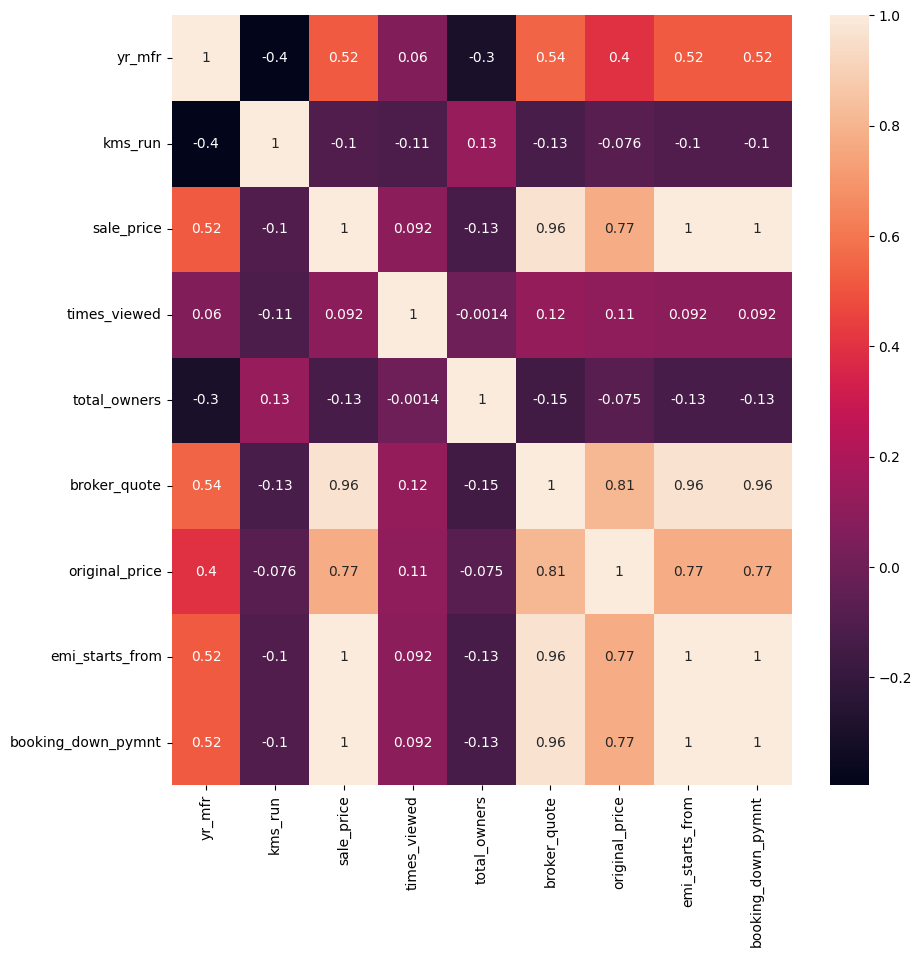

In [292]:
plt.figure(figsize=(10,10))
sns.heatmap(num_corr_data, xticklabels = num_corr_data.columns, yticklabels = num_corr_data.columns , annot = True)
plt.show()

In [293]:
print(bool_data)
print(object_data)

['assured_buy', 'is_hot', 'fitness_certificate', 'reserved', 'warranty_avail']
['car_name', 'fuel_type', 'city', 'body_type', 'transmission', 'variant', 'registered_city', 'registered_state', 'rto', 'source', 'make', 'model', 'car_availability', 'car_rating', 'ad_created_on']


In [294]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_correlation = ['assured_buy', 'is_hot', 'fitness_certificate', 'reserved', 'warranty_avail', 'car_availability', 'car_rating', 'ad_created_on']

encode = OrdinalEncoder()
copy_data[ordinal_correlation] = encode.fit_transform(copy_data[ordinal_correlation])


In [295]:
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7400 entries, 0 to 7399
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             7400 non-null   object 
 1   yr_mfr               7400 non-null   int64  
 2   fuel_type            7400 non-null   object 
 3   kms_run              7400 non-null   int64  
 4   sale_price           7400 non-null   int64  
 5   city                 7400 non-null   object 
 6   times_viewed         7400 non-null   int64  
 7   body_type            7400 non-null   object 
 8   transmission         7400 non-null   object 
 9   variant              7400 non-null   object 
 10  assured_buy          7400 non-null   float64
 11  registered_city      7400 non-null   object 
 12  registered_state     7400 non-null   object 
 13  is_hot               7400 non-null   float64
 14  rto                  7400 non-null   object 
 15  source               7400 non-null   o

In [296]:
ord_corr_data= copy_data[ordinal_correlation + ["sale_price"]].corr(method = "spearman")
ord_corr_data["sale_price"].sort_values(ascending = False)

sale_price             1.000000
car_rating             0.302523
fitness_certificate    0.180098
ad_created_on          0.139550
is_hot                 0.126570
assured_buy            0.057660
reserved               0.050795
car_availability       0.047660
warranty_avail        -0.015681
Name: sale_price, dtype: float64

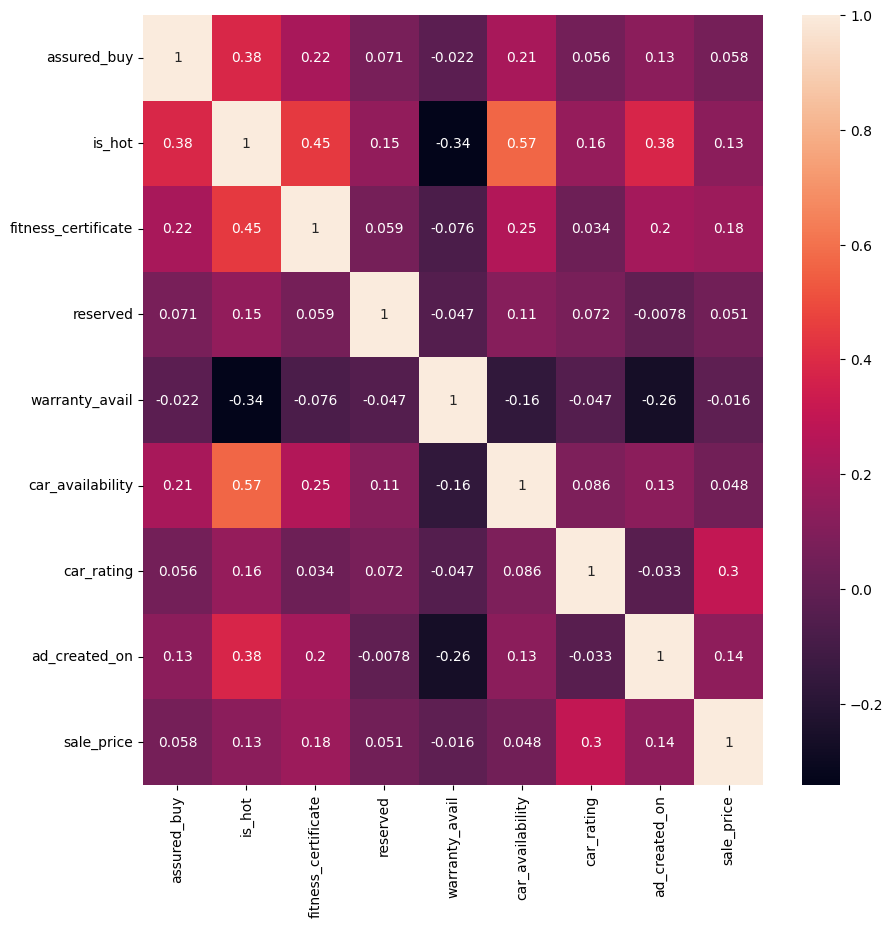

In [297]:
plt.figure(figsize=(10,10))
sns.heatmap(ord_corr_data, xticklabels = ord_corr_data.columns, yticklabels = ord_corr_data.columns , annot = True)
plt.show()

In [298]:
import os

# Create charts folder
if not os.path.exists("charts"):
    os.makedirs("charts")

top_ordinal = ['car_rating', 'fitness_certificate', 'ad_created_on']

for col in top_ordinal:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=copy_data[col], y=target_data)
    plt.title(f"Sale Price vs {col}")
    plt.xlabel(col)
    plt.ylabel("Sale Price")
    # Save figure
    plt.savefig(f"charts/boxplot_{col}.png", bbox_inches="tight")
    plt.close()

In [299]:
top_numerical = ['broker_quote', 'emi_starts_from', 'original_price']

for col in top_numerical:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=copy_data[col], y=target_data)
    sns.regplot(x=copy_data[col], y=target_data, scatter=False, color="red")  # optional regression line
    plt.title(f"Sale Price vs {col}")
    plt.xlabel(col)
    plt.ylabel("Sale Price")
    # Save figure
    plt.savefig(f"charts/scatter_{col}.png", bbox_inches="tight")
    plt.close()


C:\Users\Herbert\AppData\Local\Temp\ipykernel_12048\3340833597.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ord_corr_vals.values, y=ord_corr_vals.index, palette="viridis")


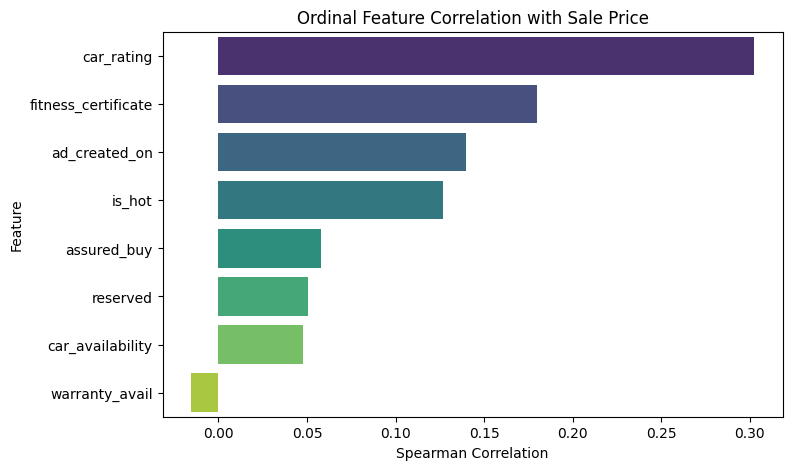

In [300]:
# Example for ordinal
ord_corr_vals = ord_corr_data['sale_price'].drop('sale_price').sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=ord_corr_vals.values, y=ord_corr_vals.index, palette="viridis")
plt.title("Ordinal Feature Correlation with Sale Price")
plt.xlabel("Spearman Correlation")
plt.ylabel("Feature")
plt.savefig("charts/ordinal_corr_barplot.png", bbox_inches="tight")
plt.show()
plt.close()


C:\Users\Herbert\AppData\Local\Temp\ipykernel_12048\104481890.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=num_corr_vals.values, y=num_corr_vals.index, palette="magma")


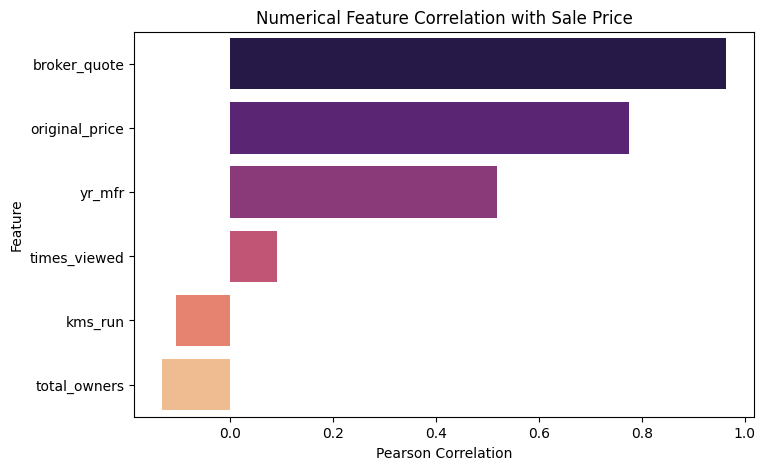

In [303]:
num_corr_vals = num_corr_data["sale_price"].drop(labels=["sale_price", "emi_starts_from" , "booking_down_pymnt"])
num_corr_vals = num_corr_vals.sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=num_corr_vals.values, y=num_corr_vals.index, palette="magma")
plt.title("Numerical Feature Correlation with Sale Price")
plt.xlabel("Pearson Correlation")
plt.ylabel("Feature")
plt.show()
plt.savefig("charts/numerical_corr_barplot.png", bbox_inches="tight")
plt.close()